In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# time: 1:38:36

## import dataset

In [3]:
customer = pd.read_csv("./Customers.csv")
customer.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## get genre and annual income values and store it as a nested list.

In [5]:
# independent features
X = customer.iloc[:, [3,4]].values

In [6]:
# no dependent features

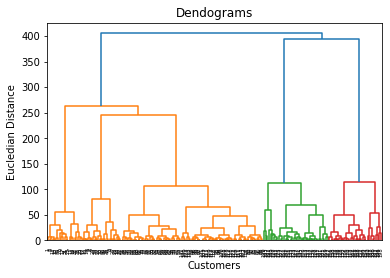

In [9]:
import scipy.cluster.hierarchy as sch
# create dendogram
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
# plot the dendogram
plt.title('Dendograms')
plt.xlabel('Customers')
plt.ylabel('Eucledian Distance')
plt.show()

## Inference:

This is taking more time than k means.
So it is better to use hierarchical clustering for smaller datasets.
Hierarchical clustering is best for larger datasets.

In [10]:
# import agglomerative clustering
# agglomerative clustering also called as hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

In [11]:
# 
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [12]:
# fit and predict on independent features
y_hc = hc.fit_predict(X)

In [13]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

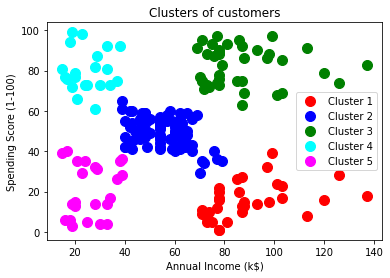

In [14]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Inference:

1. People in Cluster 1 has good annual income while they spend less.
2. People in Cluster 2 has moderal annual income, also they spend moderate.
3. People in Cluster 3 has more annual income also spending more money.
4. Cluster 4 people has less annual income while they spend more.

### Note: 
Hierarchical clustering is time consuming than kmeans

## Silhouette Clusterting

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score
lst_sl_avg = []
for i in range(2,10):
  cluster_model=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
  cluster_labels=cluster_model.fit_predict(X)
  sil_avg=silhouette_score(X,cluster_labels)
  lst_sl_avg.append(sil_avg)

In [20]:
lst_sl_avg

[0.36706444723912895,
 0.4618340266628975,
 0.4916598193892782,
 0.5529945955148897,
 0.5380208285578872,
 0.519904611908887,
 0.4326286245782246,
 0.43892545672004507]